In [1]:
import numpy as np
import cv2 # pip install opencv-python -  for detecting face features
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/ronaldo1.jpg')
img.shape

(390, 300, 3)

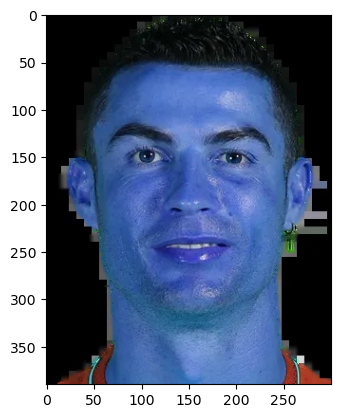

In [4]:
plt.imshow(img)

In [5]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(390, 300)

In [6]:
gray

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 68, 67, 67],
       [ 0,  0,  0, ..., 67, 67, 67],
       [ 0,  0,  0, ..., 66, 66, 66]], dtype=uint8)

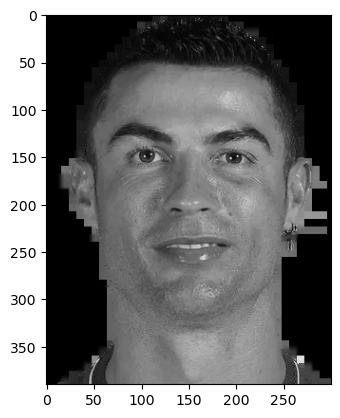

In [7]:
plt.imshow(gray, cmap = 'gray')

In [8]:
face_cascade = cv2.CascadeClassifier('C:/Users/Public/lmaaya/Projects/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Public/lmaaya/Projects/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 26,  57, 245, 245]])

In [9]:
(x, y, w, h) = faces[0]
x, y, w, h

(26, 57, 245, 245)

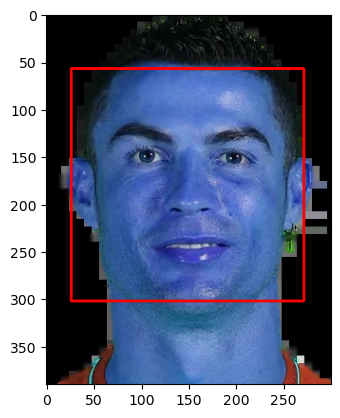

In [10]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

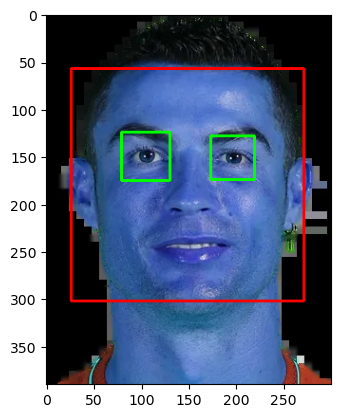

In [11]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

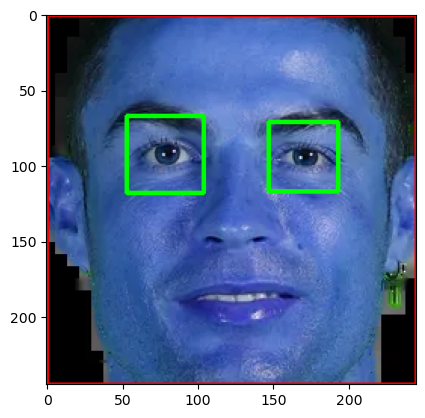

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# Function to return cropped images

In [72]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color 
        

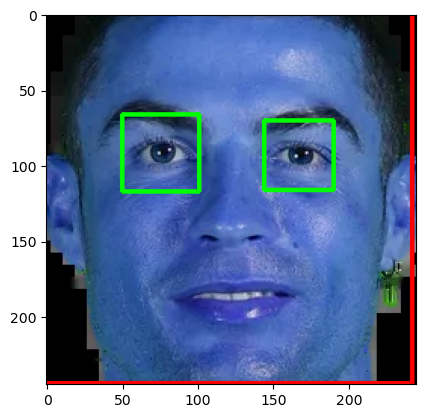

In [73]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/ronaldo1.jpg')
plt.imshow(cropped_image)

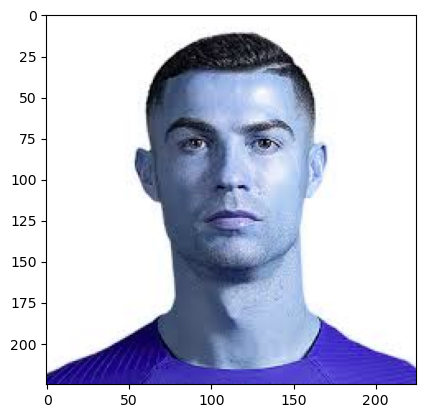

In [74]:
orig_image2 = cv2.imread('./test_images/ronaldo2.jpg')
plt.imshow(orig_image2)

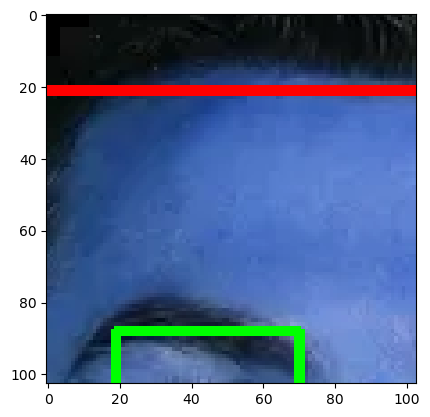

In [75]:
cropped_image2 = get_cropped_image_if_2_eyes('./test_images/ronaldo2.jpg')
plt.imshow(cropped_image2)

In [43]:
path_to_data = 'C:/Users/Public/lmaaya/data/SportsPersonClassifier/'
path_to_cr_data = 'C:/Users/Public/lmaaya/data/SportsPersonClassifier/cropped/'

In [44]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [45]:
img_dirs

['C:/Users/Public/lmaaya/data/SportsPersonClassifier/cristiano ronaldo',
 'C:/Users/Public/lmaaya/data/SportsPersonClassifier/cropped',
 'C:/Users/Public/lmaaya/data/SportsPersonClassifier/messi',
 'C:/Users/Public/lmaaya/data/SportsPersonClassifier/novak djokovic',
 'C:/Users/Public/lmaaya/data/SportsPersonClassifier/serena williams',
 'C:/Users/Public/lmaaya/data/SportsPersonClassifier/tiger woods']

In [46]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [47]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print('generating cropped images in folder: ', cropped_folder)
    

cristiano ronaldo
generating cropped images in folder:  C:/Users/Public/lmaaya/data/SportsPersonClassifier/cropped/cristiano ronaldo


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
